In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import kagglehub

In [38]:
path = kagglehub.dataset_download("fedesoriano/body-fat-prediction-dataset")

print("Path to dataset files:", path)

Path to dataset files: /home/arpan/.cache/kagglehub/datasets/fedesoriano/body-fat-prediction-dataset/versions/1


In [39]:
fat = pd.read_csv(f"{path}/bodyfat.csv")
fat

,Density,BodyFat,Age,Weight,Height,Neck,Chest,Abdomen,Hip,Thigh,Knee,Ankle,Biceps,Forearm,Wrist
0,1.0708,12.3,23,154.25,67.75,36.2,93.1,85.2,94.5,59.0,37.3,21.9,32.0,27.4,17.1
1,1.0853,6.1,22,173.25,72.25,38.5,93.6,83.0,98.7,58.7,37.3,23.4,30.5,28.9,18.2
2,1.0414,25.3,22,154.00,66.25,34.0,95.8,87.9,99.2,59.6,38.9,24.0,28.8,25.2,16.6
3,1.0751,10.4,26,184.75,72.25,37.4,101.8,86.4,101.2,60.1,37.3,22.8,32.4,29.4,18.2
4,1.0340,28.7,24,184.25,71.25,34.4,97.3,100.0,101.9,63.2,42.2,24.0,32.2,27.7,17.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
247,1.0736,11.0,70,134.25,67.00,34.9,89.2,83.6,88.8,49.6,34.8,21.5,25.6,25.7,18.5
248,1.0236,33.6,72,201.00,69.75,40.9,108.5,105.0,104.5,59.6,40.8,23.2,35.2,28.6,20.1
249,1.0328,29.3,72,186.75,66.00,38.9,111.1,111.5,101.7,60.3,37.3,21.5,31.3,27.2,18.0
250,1.0399,26.0,72,190.75,70.50,38.9,108.3,101.3,97.8,56.0,41.6,22.7,30.5,29.4,19.8


In [40]:
fat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252 entries, 0 to 251
Data columns (total 15 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Density  252 non-null    float64
 1   BodyFat  252 non-null    float64
 2   Age      252 non-null    int64  
 3   Weight   252 non-null    float64
 4   Height   252 non-null    float64
 5   Neck     252 non-null    float64
 6   Chest    252 non-null    float64
 7   Abdomen  252 non-null    float64
 8   Hip      252 non-null    float64
 9   Thigh    252 non-null    float64
 10  Knee     252 non-null    float64
 11  Ankle    252 non-null    float64
 12  Biceps   252 non-null    float64
 13  Forearm  252 non-null    float64
 14  Wrist    252 non-null    float64
dtypes: float64(14), int64(1)
memory usage: 29.7 KB


In [41]:
# sns.pairplot(fat)

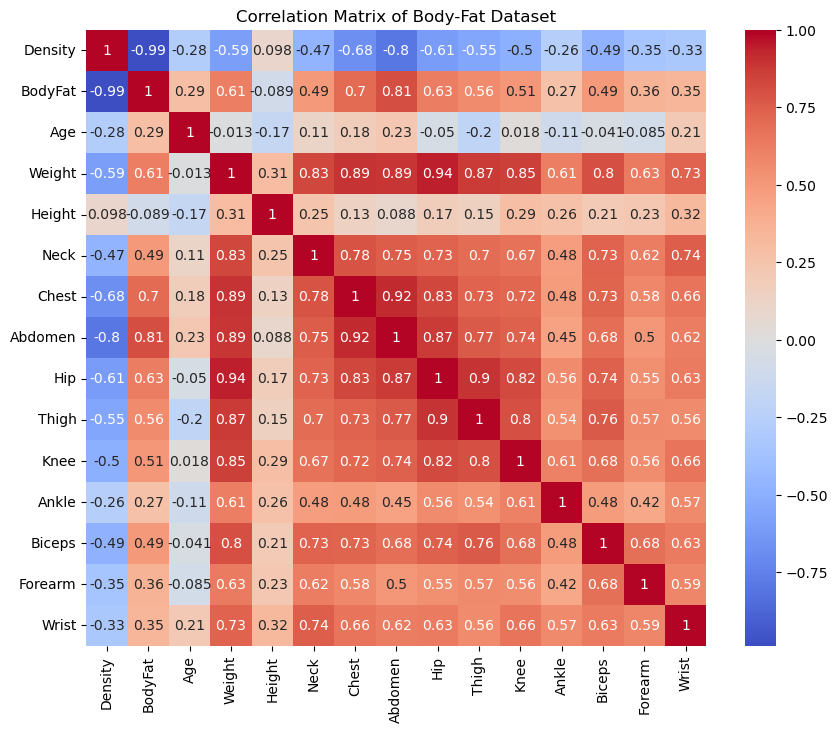

In [42]:
corr_matrix = fat.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix of Body-Fat Dataset')
plt.show()

In [43]:
y = fat['BodyFat']
X = fat.drop(columns = ['BodyFat'])
X

,Density,Age,Weight,Height,Neck,Chest,Abdomen,Hip,Thigh,Knee,Ankle,Biceps,Forearm,Wrist
0,1.0708,23,154.25,67.75,36.2,93.1,85.2,94.5,59.0,37.3,21.9,32.0,27.4,17.1
1,1.0853,22,173.25,72.25,38.5,93.6,83.0,98.7,58.7,37.3,23.4,30.5,28.9,18.2
2,1.0414,22,154.00,66.25,34.0,95.8,87.9,99.2,59.6,38.9,24.0,28.8,25.2,16.6
3,1.0751,26,184.75,72.25,37.4,101.8,86.4,101.2,60.1,37.3,22.8,32.4,29.4,18.2
4,1.0340,24,184.25,71.25,34.4,97.3,100.0,101.9,63.2,42.2,24.0,32.2,27.7,17.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
247,1.0736,70,134.25,67.00,34.9,89.2,83.6,88.8,49.6,34.8,21.5,25.6,25.7,18.5
248,1.0236,72,201.00,69.75,40.9,108.5,105.0,104.5,59.6,40.8,23.2,35.2,28.6,20.1
249,1.0328,72,186.75,66.00,38.9,111.1,111.5,101.7,60.3,37.3,21.5,31.3,27.2,18.0
250,1.0399,72,190.75,70.50,38.9,108.3,101.3,97.8,56.0,41.6,22.7,30.5,29.4,19.8


In [44]:
y

0      12.3
1       6.1
2      25.3
3      10.4
4      28.7
       ... 
247    11.0
248    33.6
249    29.3
250    26.0
251    31.9
Name: BodyFat, Length: 252, dtype: float64

# Linear Regression

## Standardize the Dataset

In [45]:
def standardize(X):
    for i in X.columns:
        X[i] = (X[i] - X[i].mean())/X[i].std()
            
    return X

In [46]:
X = standardize(X)
X

,Density,Age,Weight,Height,Neck,Chest,Abdomen,Hip,Thigh,Knee,Ankle,Biceps,Forearm,Wrist
0,0.800055,-1.736617,-0.839575,-0.654901,-0.737198,-0.916224,-0.682176,-0.754427,-0.077325,-0.535067,-0.709414,-0.090496,-0.625474,-1.210133
1,1.561952,-1.815970,-0.193078,0.573648,0.208949,-0.856916,-0.886199,-0.168168,-0.134468,-0.535067,0.175598,-0.586975,0.116847,-0.031879
2,-0.744758,-1.815970,-0.848082,-1.064418,-1.642207,-0.595958,-0.431783,-0.098375,0.036962,0.128337,0.529602,-1.149652,-1.714210,-1.745703
3,1.025997,-1.498561,0.198223,0.573648,-0.243556,0.115746,-0.570890,0.180797,0.132201,-0.535067,-0.178407,0.041899,0.364287,-0.031879
4,-1.133588,-1.657265,0.181210,0.300637,-1.477660,-0.418032,0.690345,0.278507,0.722682,1.496607,0.529602,-0.024299,-0.477010,-0.567449
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
247,0.947180,1.992938,-1.520098,-0.859660,-1.271976,-1.378832,-0.830556,-1.550066,-1.867818,-1.571635,-0.945417,-2.208808,-1.466770,0.289463
248,-1.680053,2.151642,0.751148,-0.108879,1.196232,0.910482,1.154035,0.641430,0.036962,0.916129,0.057596,0.968660,-0.031617,2.003287
249,-1.196642,2.151642,0.266275,-1.132671,0.373496,1.218887,1.756831,0.250590,0.170296,-0.535067,-0.945417,-0.322186,-0.724450,-0.246107
250,-0.823575,2.151642,0.402379,0.095879,0.373496,0.886758,0.810905,-0.293795,-0.648759,1.247831,-0.237408,-0.586975,0.364287,1.681945


## Gradient Descend

In [47]:
def gradient_descend(X, y, learning_rate = 0.01, n_iter = 1000):
    # X = normalize(X)
    X = np.c_[np.ones(X.shape[0]), X]   # to calculate the bias term
    theta = np.zeros(X.shape[1])
    m = X.shape[0]
    
    for i in range(n_iter):
        h = X @ theta
        loss = (h - y)
        gradient = X.T @ loss / m
        theta = theta - (learning_rate * gradient)
    return theta

In [48]:
gradient_descend(X,y)

array([19.14996689, -7.19902639,  0.24322083, -0.06041829,  0.02063024,
       -0.25057738,  0.20443474,  1.28902516, -0.07156847,  0.09372987,
       -0.07492834, -0.04837253, -0.10312249,  0.20728066, -0.24024931])

# Define Fitness Function

Here we are using $\textbf{Akaike Information Criterion}$ which is given by the formula
    
$AIC = 2k - 2ln(\hat{L})$

where $k$ = number of estimated parameters 
      $\hat{L}$ = maximised value of likelihood function
 

In [49]:
def rss(X,y,theta):
    # X = normalize(X)
    X = np.c_[np.ones(X.shape[0]), X]
    residual_sum_squares = sum(((X @ theta) - y)**2)
    return residual_sum_squares

def calculate_aic(X,y,theta):
    n = len(y)
    aic = 2 * X.shape[1] + n * np.log(rss(X,y,theta) / n)
    return aic    

In [50]:
calculate_aic(X,y,gradient_descend(X,y))

154.94508599139297

# Generate Parent Population

In [51]:
def parent_pops(X,size,y):
    papa_pops = []
    # df_temp = data.drop(y, axis = 1)
    for i in range(size):
        feature_arrs = np.random.choice([True,False],size = X.shape[1])
        papa_pops.append(X.iloc[:, np.where(feature_arrs)[0]])
    return papa_pops


In [52]:
test_parents = parent_pops(X,10,y)
test_parents

[       Height      Neck     Chest       Hip     Thigh     Ankle    Biceps  \
 0   -0.654901 -0.737198 -0.916224 -0.754427 -0.077325 -0.709414 -0.090496   
 1    0.573648  0.208949 -0.856916 -0.168168 -0.134468  0.175598 -0.586975   
 2   -1.064418 -1.642207 -0.595958 -0.098375  0.036962  0.529602 -1.149652   
 3    0.573648 -0.243556  0.115746  0.180797  0.132201 -0.178407  0.041899   
 4    0.300637 -1.477660 -0.418032  0.278507  0.722682  0.529602 -0.024299   
 ..        ...       ...       ...       ...       ...       ...       ...   
 247 -0.859660 -1.271976 -1.378832 -1.550066 -1.867818 -0.945417 -2.208808   
 248 -0.108879  1.196232  0.910482  0.641430  0.036962  0.057596  0.968660   
 249 -1.132671  0.373496  1.218887  0.250590  0.170296 -0.945417 -0.322186   
 250  0.095879  0.373496  0.886758 -0.293795 -0.648759 -0.237408 -0.586975   
 251 -0.040627  1.155095  1.373089  1.004352 -0.020182  0.883607  0.472181   
 
         Wrist  
 0   -1.210133  
 1   -0.031879  
 2   -1.745

# Calculate Fitness of Parents

In [53]:
def parent_score(parents, y):
    pop_score = {}
    temp_var = 0
    for parent in parents:
        theta1 = gradient_descend(parent, y, learning_rate = 0.01, n_iter = 1000)
        aic = calculate_aic(parent, y, theta1)
        pop_score[temp_var] = aic
        temp_var += 1
    return pop_score

In [54]:
test_parent_score = parent_score(test_parents, y)
test_parent_score

{0: 881.8467216227564,
 1: 140.16124291798616,
 2: 879.0123936568087,
 3: 763.4920784559499,
 4: 138.76335545207837,
 5: 141.8525133999339,
 6: 144.39678323506834,
 7: 144.0742364639291,
 8: 880.8354943898037,
 9: 794.7763392831935}

# Select n Fittest Parents

In [55]:
def fittest_parents(population,lamda,y):

    parent_scores = parent_score(population,y)
    fittest_parent = []
    sorted_parents = sorted(parent_scores.items(), key = lambda x:x[1])
    top_lamda_parents_indices = sorted_parents[:lamda]
    top_lamda_parents = [item[0] for item in top_lamda_parents_indices]
    
    for i in top_lamda_parents:
        fittest_parent.append(population[i])
    return fittest_parent

In [56]:
fittest_parents(test_parents,5,y)

[      Density    Weight     Chest   Abdomen     Thigh     Ankle    Biceps  \
 0    0.800055 -0.839575 -0.916224 -0.682176 -0.077325 -0.709414 -0.090496   
 1    1.561952 -0.193078 -0.856916 -0.886199 -0.134468  0.175598 -0.586975   
 2   -0.744758 -0.848082 -0.595958 -0.431783  0.036962  0.529602 -1.149652   
 3    1.025997  0.198223  0.115746 -0.570890  0.132201 -0.178407  0.041899   
 4   -1.133588  0.181210 -0.418032  0.690345  0.722682  0.529602 -0.024299   
 ..        ...       ...       ...       ...       ...       ...       ...   
 247  0.947180 -1.520098 -1.378832 -0.830556 -1.867818 -0.945417 -2.208808   
 248 -1.680053  0.751148  0.910482  1.154035  0.036962  0.057596  0.968660   
 249 -1.196642  0.266275  1.218887  1.756831  0.170296 -0.945417 -0.322186   
 250 -0.823575  0.402379  0.886758  0.810905 -0.648759 -0.237408 -0.586975   
 251 -1.496146  0.972318  1.373089  1.478618 -0.020182  0.883607  0.472181   
 
       Forearm  
 0   -0.625474  
 1    0.116847  
 2   -1.714

In [57]:
parent_score(fittest_parents(test_parents,5,y),y)

{0: 138.76335545207837,
 1: 140.16124291798616,
 2: 141.8525133999339,
 3: 144.0742364639291,
 4: 144.39678323506834}

In [58]:
test_new = []
test_new.extend(fittest_parents(test_parents,5,y)[:2])
test_new

[      Density    Weight     Chest   Abdomen     Thigh     Ankle    Biceps  \
 0    0.800055 -0.839575 -0.916224 -0.682176 -0.077325 -0.709414 -0.090496   
 1    1.561952 -0.193078 -0.856916 -0.886199 -0.134468  0.175598 -0.586975   
 2   -0.744758 -0.848082 -0.595958 -0.431783  0.036962  0.529602 -1.149652   
 3    1.025997  0.198223  0.115746 -0.570890  0.132201 -0.178407  0.041899   
 4   -1.133588  0.181210 -0.418032  0.690345  0.722682  0.529602 -0.024299   
 ..        ...       ...       ...       ...       ...       ...       ...   
 247  0.947180 -1.520098 -1.378832 -0.830556 -1.867818 -0.945417 -2.208808   
 248 -1.680053  0.751148  0.910482  1.154035  0.036962  0.057596  0.968660   
 249 -1.196642  0.266275  1.218887  1.756831  0.170296 -0.945417 -0.322186   
 250 -0.823575  0.402379  0.886758  0.810905 -0.648759 -0.237408 -0.586975   
 251 -1.496146  0.972318  1.373089  1.478618 -0.020182  0.883607  0.472181   
 
       Forearm  
 0   -0.625474  
 1    0.116847  
 2   -1.714

# Uniform Crossover

In [59]:
def uniform_crossover(X,parent1, parent2):

    parent_list1 = parent1.columns.tolist()
    # temp = 0
    
    bool_arr1 = np.zeros(X.shape[1])
    for i in parent_list1:
        bool_arr1[X.columns.get_loc(i)] = 1
        
    bool_arr2 = np.zeros(X.shape[1])
    parent_list2 = parent2.columns.tolist()
    for i in parent_list2:
        bool_arr2[X.columns.get_loc(i)] = 1
        
    for i in range(len(bool_arr1)):
        if np.random.uniform() >= 0.5:
            temp = bool_arr1[i]
            bool_arr1[i] = bool_arr2[i]
            bool_arr2[i] = temp
            continue
            
    new_parent1 = X.iloc[:, np.where(bool_arr1)[0]]
    new_parent2 = X.iloc[:, np.where(bool_arr2)[0]]
    return  new_parent1, new_parent2

In [60]:
test_parent1 = fittest_parents(test_parents,5,y)[0]
test_parent2 = fittest_parents(test_parents,5,y)[1]
test_parent1

,Density,Weight,Chest,Abdomen,Thigh,Ankle,Biceps,Forearm
0,0.800055,-0.839575,-0.916224,-0.682176,-0.077325,-0.709414,-0.090496,-0.625474
1,1.561952,-0.193078,-0.856916,-0.886199,-0.134468,0.175598,-0.586975,0.116847
2,-0.744758,-0.848082,-0.595958,-0.431783,0.036962,0.529602,-1.149652,-1.714210
3,1.025997,0.198223,0.115746,-0.570890,0.132201,-0.178407,0.041899,0.364287
4,-1.133588,0.181210,-0.418032,0.690345,0.722682,0.529602,-0.024299,-0.477010
...,...,...,...,...,...,...,...,...
247,0.947180,-1.520098,-1.378832,-0.830556,-1.867818,-0.945417,-2.208808,-1.466770
248,-1.680053,0.751148,0.910482,1.154035,0.036962,0.057596,0.968660,-0.031617
249,-1.196642,0.266275,1.218887,1.756831,0.170296,-0.945417,-0.322186,-0.724450
250,-0.823575,0.402379,0.886758,0.810905,-0.648759,-0.237408,-0.586975,0.364287


In [61]:
test_parent2

,Density,Age,Neck,Abdomen,Hip,Thigh,Biceps
0,0.800055,-1.736617,-0.737198,-0.682176,-0.754427,-0.077325,-0.090496
1,1.561952,-1.815970,0.208949,-0.886199,-0.168168,-0.134468,-0.586975
2,-0.744758,-1.815970,-1.642207,-0.431783,-0.098375,0.036962,-1.149652
3,1.025997,-1.498561,-0.243556,-0.570890,0.180797,0.132201,0.041899
4,-1.133588,-1.657265,-1.477660,0.690345,0.278507,0.722682,-0.024299
...,...,...,...,...,...,...,...
247,0.947180,1.992938,-1.271976,-0.830556,-1.550066,-1.867818,-2.208808
248,-1.680053,2.151642,1.196232,1.154035,0.641430,0.036962,0.968660
249,-1.196642,2.151642,0.373496,1.756831,0.250590,0.170296,-0.322186
250,-0.823575,2.151642,0.373496,0.810905,-0.293795,-0.648759,-0.586975


In [62]:
test_offspring1,test_offspring2 = uniform_crossover(X,test_parent1,test_parent2)
test_offspring1

,Density,Age,Neck,Chest,Abdomen,Thigh,Ankle,Biceps
0,0.800055,-1.736617,-0.737198,-0.916224,-0.682176,-0.077325,-0.709414,-0.090496
1,1.561952,-1.815970,0.208949,-0.856916,-0.886199,-0.134468,0.175598,-0.586975
2,-0.744758,-1.815970,-1.642207,-0.595958,-0.431783,0.036962,0.529602,-1.149652
3,1.025997,-1.498561,-0.243556,0.115746,-0.570890,0.132201,-0.178407,0.041899
4,-1.133588,-1.657265,-1.477660,-0.418032,0.690345,0.722682,0.529602,-0.024299
...,...,...,...,...,...,...,...,...
247,0.947180,1.992938,-1.271976,-1.378832,-0.830556,-1.867818,-0.945417,-2.208808
248,-1.680053,2.151642,1.196232,0.910482,1.154035,0.036962,0.057596,0.968660
249,-1.196642,2.151642,0.373496,1.218887,1.756831,0.170296,-0.945417,-0.322186
250,-0.823575,2.151642,0.373496,0.886758,0.810905,-0.648759,-0.237408,-0.586975


# Random Bit-Flip Mutation

In [63]:
def rbf_mutation(X,parent1, parent2,mutation_rate):
    # X = data.drop(target_variable, axis = 1)
    
    bool_arr1 = np.zeros(X.shape[1])
    parent_list1 = parent1.columns.tolist()
    for i in parent_list1:
        bool_arr1[X.columns.get_loc(i)] = 1
        
    bool_arr2 = np.zeros(X.shape[1])
    parent_list2 = parent2.columns.tolist()
    for i in parent_list2:
        bool_arr2[X.columns.get_loc(i)] = 1
        
    for i in range(len(bool_arr1)):
        if mutation_rate > np.random.normal(loc = .5, scale = .25, size = 1):
            bool_arr1[i] = 1-bool_arr1[i]
            continue
    for i in range(len(bool_arr2)):
        if mutation_rate > np.random.normal(loc = .5, scale = .25, size = 1):
            bool_arr2[i] = 1-bool_arr2[i]
            continue
            
    new_parent1 = X.iloc[:, np.where(bool_arr1)[0]]
    new_parent2 = X.iloc[:, np.where(bool_arr2)[0]]    
    
    return new_parent1, new_parent2

In [64]:
test_parent1

,Density,Weight,Chest,Abdomen,Thigh,Ankle,Biceps,Forearm
0,0.800055,-0.839575,-0.916224,-0.682176,-0.077325,-0.709414,-0.090496,-0.625474
1,1.561952,-0.193078,-0.856916,-0.886199,-0.134468,0.175598,-0.586975,0.116847
2,-0.744758,-0.848082,-0.595958,-0.431783,0.036962,0.529602,-1.149652,-1.714210
3,1.025997,0.198223,0.115746,-0.570890,0.132201,-0.178407,0.041899,0.364287
4,-1.133588,0.181210,-0.418032,0.690345,0.722682,0.529602,-0.024299,-0.477010
...,...,...,...,...,...,...,...,...
247,0.947180,-1.520098,-1.378832,-0.830556,-1.867818,-0.945417,-2.208808,-1.466770
248,-1.680053,0.751148,0.910482,1.154035,0.036962,0.057596,0.968660,-0.031617
249,-1.196642,0.266275,1.218887,1.756831,0.170296,-0.945417,-0.322186,-0.724450
250,-0.823575,0.402379,0.886758,0.810905,-0.648759,-0.237408,-0.586975,0.364287


In [65]:
test_mutant1,test_mutant2 = rbf_mutation(X,test_parent1,test_parent2,0.6)
test_mutant1

,Height,Neck,Hip,Thigh,Knee,Ankle,Biceps,Forearm
0,-0.654901,-0.737198,-0.754427,-0.077325,-0.535067,-0.709414,-0.090496,-0.625474
1,0.573648,0.208949,-0.168168,-0.134468,-0.535067,0.175598,-0.586975,0.116847
2,-1.064418,-1.642207,-0.098375,0.036962,0.128337,0.529602,-1.149652,-1.714210
3,0.573648,-0.243556,0.180797,0.132201,-0.535067,-0.178407,0.041899,0.364287
4,0.300637,-1.477660,0.278507,0.722682,1.496607,0.529602,-0.024299,-0.477010
...,...,...,...,...,...,...,...,...
247,-0.859660,-1.271976,-1.550066,-1.867818,-1.571635,-0.945417,-2.208808,-1.466770
248,-0.108879,1.196232,0.641430,0.036962,0.916129,0.057596,0.968660,-0.031617
249,-1.132671,0.373496,0.250590,0.170296,-0.535067,-0.945417,-0.322186,-0.724450
250,0.095879,0.373496,-0.293795,-0.648759,1.247831,-0.237408,-0.586975,0.364287


# The $(\mu , \lambda)$ Genetic Algorithm



In [66]:
# def gen_alg(X,y,pop_size,no_parents_selected,iterations,mutation_rate): 
#     # data = data.drop(target_variable, axis = 1)
#     population = parent_pops(X,pop_size,y)
    
#     for z in range(iterations):
#         print("iteration:",z)
#         parents = fittest_parents(population,no_parents_selected,y)
#         # print("parents:",parents[0])
#         new_gen = []
#         for i in range(len(parents)):
#             for j in range(i+1, len(parents)):
#                 parent1 = parents[i]
#                 parent2 = parents[j]
#                 if np.random.normal(loc = .5 , scale = .25 , size = 1) < 0.5:
#                     offspring1, offspring2 = uniform_crossover(X, parent1, parent2)
#                 else:
#                     offspring1, offspring2 = rbf_mutation(X, parent1, parent2, mutation_rate)
#                 new_gen.append(offspring1)
#                 new_gen.append(offspring2)
#         population = new_gen

#     return fittest_parents(population,1,y)[0]

In [67]:
def gen_alg(X, y, pop_size, no_parents_selected, iterations, mutation_rate): 
    population = parent_pops(X, pop_size, y)
    aic_scores = []

    for z in range(iterations):
        print("iteration:", z)
        parents = fittest_parents(population, no_parents_selected, y)
        new_gen = []
        for i in range(len(parents)):
            for j in range(i + 1, len(parents)):
                parent1 = parents[i]
                parent2 = parents[j]
                if np.random.normal(loc = .5, scale = .25, size = 1) < 0.5:
                    offspring1, offspring2 = uniform_crossover(X, parent1, parent2)
                else:
                    offspring1, offspring2 = rbf_mutation(X, parent1, parent2, mutation_rate)
                new_gen.append(offspring1)
                new_gen.append(offspring2)
        population = new_gen
        best_parent = fittest_parents(population, 1, y)[0]
        aic_scores.append(calculate_aic(best_parent, y, gradient_descend(best_parent, y)))

    return best_parent, aic_scores


# The $(\mu + \lambda)$ Genetic Algorithm [Elistism]

In [68]:
# def gen_alg2(X,y,pop_size,no_parents_selected,iterations,mutation_rate,num_parents_to_new_gen): 
#     # data = data.drop(target_variable, axis = 1)
#     population = parent_pops(X,pop_size,y)
    
#     for z in range(iterations):
#         print("iteration:",z)
#         parents = fittest_parents(population,no_parents_selected,y)
#         # print("parents:",parents[0])
#         new_gen = []
#         new_gen.extend(parents[:num_parents_to_new_gen])
#         for i in range(len(parents)):
#             for j in range(i+1, len(parents)):
#                 parent1 = parents[i]
#                 parent2 = parents[j]
#                 if np.random.normal(loc = .5 , scale = .25 , size = 1) < 0.5:
#                     offspring1, offspring2 = uniform_crossover(X, parent1, parent2)
#                 else:
#                     offspring1, offspring2 = rbf_mutation(X, parent1, parent2, mutation_rate)
#                 new_gen.append(offspring1)
#                 new_gen.append(offspring2)
#         population = new_gen

#     return fittest_parents(population,1,y)[0]

In [69]:
def gen_alg2(X, y, pop_size, no_parents_selected, iterations, mutation_rate, num_parents_to_new_gen): 
    population = parent_pops(X, pop_size, y)
    aic_scores = []

    for z in range(iterations):
        print("iteration:", z)
        parents = fittest_parents(population, no_parents_selected, y)
        new_gen = []
        new_gen.extend(parents[:num_parents_to_new_gen])
        for i in range(len(parents)):
            for j in range(i + 1, len(parents)):
                parent1 = parents[i]
                parent2 = parents[j]
                if np.random.normal(loc = .5, scale = .25, size = 1) < 0.5:
                    offspring1, offspring2 = uniform_crossover(X, parent1, parent2)
                else:
                    offspring1, offspring2 = rbf_mutation(X, parent1, parent2, mutation_rate)
                new_gen.append(offspring1)
                new_gen.append(offspring2)
        population = new_gen
        best_parent = fittest_parents(population, 1, y)[0]
        aic_scores.append(calculate_aic(best_parent, y, gradient_descend(best_parent, y)))

    return best_parent, aic_scores


# Results

In [72]:

# Run the genetic algorithms and collect AIC scores
best_parent1, aic_scores1 = gen_alg(X, y, 50, 10, 10, 0.2)
best_parent2, aic_scores2 = gen_alg2(X, y, 50, 10, 10, 0.2, 5)


iteration: 0
iteration: 1
iteration: 2
iteration: 3
iteration: 4
iteration: 5
iteration: 6
iteration: 7
iteration: 8
iteration: 9
iteration: 0
iteration: 1
iteration: 2
iteration: 3
iteration: 4
iteration: 5
iteration: 6
iteration: 7
iteration: 8
iteration: 9


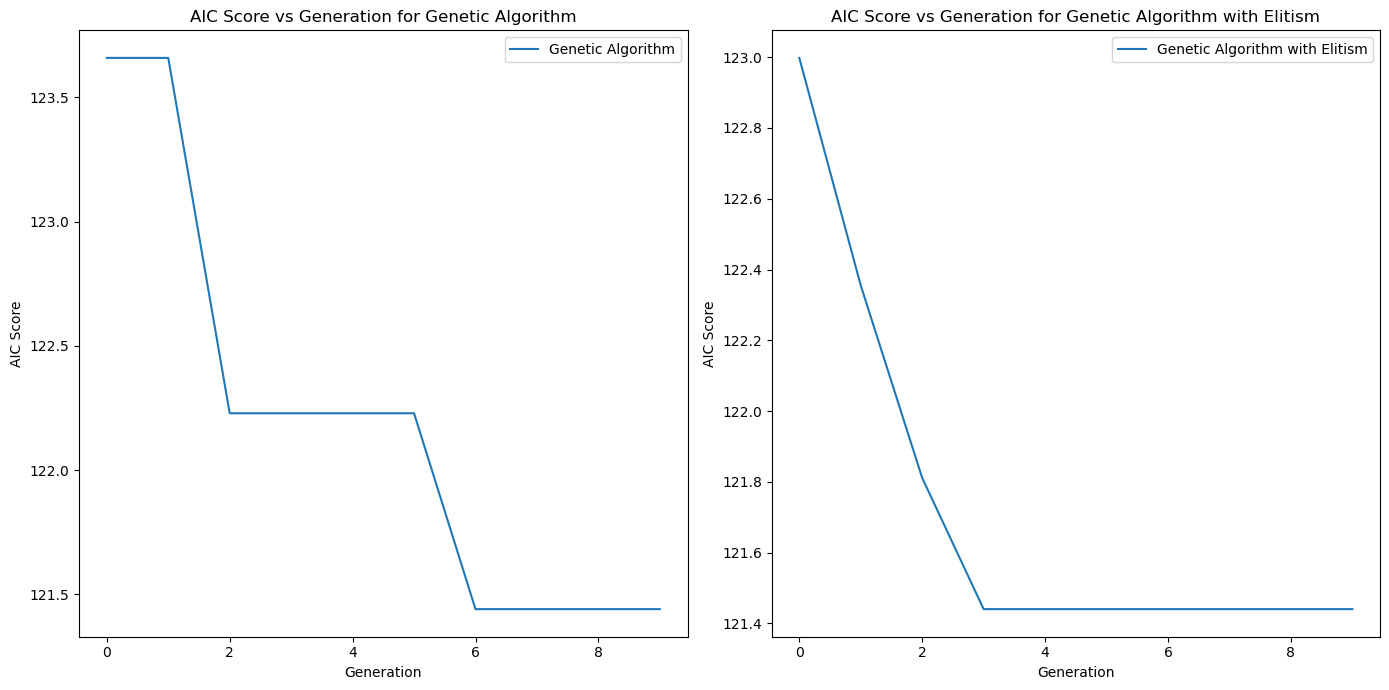

In [75]:
# Plot the AIC scores
plt.figure(figsize=(14, 7))

plt.subplot(1, 2, 1)
plt.plot(range(len(aic_scores1)), aic_scores1, label='Genetic Algorithm')
plt.xlabel('Generation')
plt.ylabel('AIC Score')
plt.title('AIC Score vs Generation for Genetic Algorithm')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(range(len(aic_scores2)), aic_scores2, label='Genetic Algorithm with Elitism')
plt.xlabel('Generation')
plt.ylabel('AIC Score')
plt.title('AIC Score vs Generation for Genetic Algorithm with Elitism')
plt.legend()

plt.tight_layout()
plt.show()